<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Classification/Models%20on%20Emotion%20Stimulus%20Dataset/Logistic%20Regression/ktrain_fasttext_emotion_stimulus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Shamsul Arefin

**Description**: In this file I implemented the Logistic Regression Model with the FastText library, in the ktrain package. The dataset used is the Emotion Stimulus dataset.

**Installing ktrain wrapper library**

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 127kB/s 
     |████████████████████████████████| 6.8MB 53.7MB/s 
     |████████████████████████████████| 983kB 47.7MB/s 
     |████████████████████████████████| 266kB 55.9MB/s 
     |████████████████████████████████| 1.9MB 46.3MB/s 
     |████████████████████████████████| 1.2MB 42.9MB/s 
     |████████████████████████████████| 471kB 53.1MB/s 
     |████████████████████████████████| 870kB 50.1MB/s 
     |████████████████████████████████| 3.3MB 48.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=13f1cca178315291c7a27f0defd29f442f3e7f108f0b5fe6bb1db4d9c6ae0a15
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=16a9bbfff3c73303ecfdb9f9b85370ce6333eeb36751060591a7562b69ab5e96
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

**Installing other dependecies such as pandas, numpy**

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

**Mounting google drive storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/bert-project-data/

/content/drive/MyDrive/bert-project-data


**Importing dependencies for the preprocessing of Emotion stimulus data**

In [ ]:
# For emotion
from pandas import DataFrame
import textblob
from textblob import TextBlob

**Opening the Emotion Stimulus Text data as File**

In [ ]:
# For emotion
with open('./No Cause.txt') as f:
    conversations = f.readlines()

**Preprocessing Emotion Stimulus data  with Regex Check and BeautifulSoup library**

In [ ]:
#For emotion data
import re
from bs4 import BeautifulSoup

data = {}

for line in conversations:
    result = re.search(r"<[a-zA-z]+>", line)
    emotion = result.group(0)
    emotion  = emotion[1:(len(emotion)-1)]
    #print(emotion)

    soup = BeautifulSoup(line)
    x = soup.findAll(emotion)
    #print(x)

    txt = ''.join(x[0].findAll(text=True)).strip()

    data[txt] = emotion
print(data)

{'This did the trick : the boys now have a more distant friendship and David is much happier .': 'happy', 'When Anna left Inspector Aziz , she was much happier .': 'happy', "And though , as Lachlan had planned , they had expected the attack in the morning , they were quite happy when their lookouts reported the Macleans ' approach in the early evening .": 'happy', "Honestly , I 'm really happy for you !": 'happy', 'Lesley was totally happy about it .': 'happy', 'For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition .': 'happy', 'She became happier , more settled .': 'happy', 'During the day her mother seemed happy at times , baking , trying out fresh recipes , or changing yet again the curtains , or crocheting new chair-backs .': 'happy', 'They seemed happy about my victory in Germany and most of them expected me to win more races last year . "': 'happy', 'Never before had Bodmin seen so many faces 

**Formatting the data and Dividing Data into Test and Train**

In [ ]:
#For emotion data
from sklearn.model_selection import train_test_split
data_frame = DataFrame(data.items(), columns=['Emotion', 'Text'])
X_all = data_frame.Emotion.tolist()
y_all = data_frame.Text.tolist()
class_names = ['happy', 'sad', 'fear', 'anger', 'disgust','shame','surprise']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.2, random_state=4)
print('size of train set: %s' % (len(X_train)))
print('size of test set: %s' % (len(X_test)))
data_frame.head(10)

size of train set: 1271
size of test set: 318


,Emotion,Text
0,This did the trick : the boys now have a more ...,happy
1,"When Anna left Inspector Aziz , she was much h...",happy
2,"And though , as Lachlan had planned , they had...",happy
3,"Honestly , I 'm really happy for you !",happy
4,Lesley was totally happy about it .,happy
5,"For once in his life , Leopold must have been ...",happy
6,"She became happier , more settled .",happy
7,During the day her mother seemed happy at time...,happy
8,They seemed happy about my victory in Germany ...,happy
9,Never before had Bodmin seen so many faces an...,happy


**Changing string encoding of labels to integers for model preprocessing**

In [ ]:
#Run this code exactly once after running the previous block of code
encoding = {
    'happy': 0,
    'sad': 1,
    'fear': 2,
    'anger': 3,
    'disgust':4,
    'shame':5,
    'surprise':6
}

# Integer values for each class


# encoding_2_modified = {value:key for key, value in encoding.items()}
y_test_string_backup = y_test.copy()
y_train_2 = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]
print("Encoding block of code ran successfully")

Encoding block of code ran successfully


**Preprocessing input data for the FastText model by the library**

In [ ]:
(x_train,  y_train_2), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train_2,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names =class_names,
                                                                       maxlen=350, 
                                                                       max_features=35000,
                                                                       ngram_range=1)

language: en
Word Counts: 4960
Nrows: 1271
1271 train sequences
train sequence lengths:
	mean : 18
	95percentile : 33
	99percentile : 36
x_train shape: (1271,350)
y_train shape: (1271, 7)
Is Multi-Label? False
318 test sequences
test sequence lengths:
	mean : 15
	95percentile : 28
	99percentile : 31
x_test shape: (318,350)
y_test shape: (318, 7)
task: text classification


**Defining model with the preprocessed data**

In [ ]:
model = text.text_classifier('fasttext', (x_train, y_train_2), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train_2), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 350
done.


**Training with the Learner object**

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/ktrain/core.py:536: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
40/40 [==============================] - 4s 24ms/step - loss: 2.4871 - accuracy: 0.1405
Epoch 2/5
40/40 [==============================] - 1s 23ms/step - loss: 2.4854 - accuracy: 0.1519
Epoch 3/5
40/40 [==============================] - 1s 24ms/step - loss: 2.4220 - accuracy: 0.1637
Epoch 4/5
40/40 [==============================] - 1s 23ms/step - loss: 1.8599 - accuracy: 0.3308
Epoch 5/5
40/40 [==============================] - 1s 18ms/step - loss: 77.6680 - accuracy: 0.2687


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


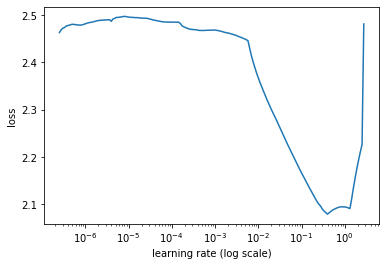

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
learner.autofit(0.01)
#learner.fit_onecycle(2e-5, 15)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
40/40 [==============================] - 2s 30ms/step - loss: 2.1420 - accuracy: 0.2179 - val_loss: 1.8662 - val_accuracy: 0.1950
Epoch 2/1024
40/40 [==============================] - 1s 25ms/step - loss: 1.6928 - accuracy: 0.3564 - val_loss: 1.8588 - val_accuracy: 0.4214
Epoch 3/1024
40/40 [==============================] - 1s 24ms/step - loss: 1.2607 - accuracy: 0.5515 - val_loss: 1.7579 - val_accuracy: 0.5472
Epoch 4/1024
40/40 [==============================] - 1s 25ms/step - loss: 0.8832 - accuracy: 0.7057 - val_loss: 1.5538 - val_accuracy: 0.7799
Epoch 5/1024
40/40 [==============================] - 1s 24ms/step - loss: 0.6732 - accuracy: 0.7773 - val_loss: 1.2572 - val_accuracy: 0.8145
Epoch 6/1024
40/40 [==============================] - 1s 25ms/step - loss: 0.4913 - accuracy: 0.8371 -

**Validating the model on the test data and getting Confusion Matrix**

In [ ]:
confusion_matrix = learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

       happy       0.90      0.97      0.93        58
         sad       0.96      0.96      0.96        97
        fear       0.96      0.89      0.92        53
       anger       0.89      0.94      0.91        62
     disgust       0.83      0.83      0.83         6
       shame       0.93      0.88      0.90        16
    surprise       0.92      0.85      0.88        26

    accuracy                           0.93       318
   macro avg       0.91      0.90      0.91       318
weighted avg       0.93      0.93      0.93       318



**Plotting the confusion matrix**

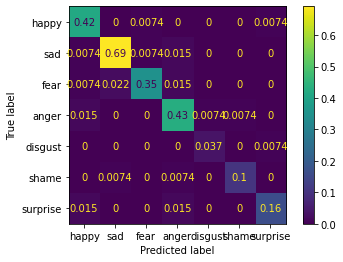

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

norm = np.linalg.norm(confusion_matrix)
normal_array = confusion_matrix/norm

disp = ConfusionMatrixDisplay(confusion_matrix=normal_array,
                              display_labels=class_names)
#plot_confusion_matrix()


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True,
                 cmap='viridis', ax=None, xticks_rotation='horizontal')

**Getting the predictor object from the trained Model**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['happy', 'sad', 'fear', 'anger', 'disgust', 'shame', 'surprise']

**Testing the model predictor with a new sentence**

In [ ]:
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: surprise (0.04)


**Saving the trained model predictor to Google Drive**

In [ ]:
# let's save the predictor for later use
predictor.save("models/fast_text-emotion-stimulus/")

**Load the saved model predictor to check if it works**

In [ ]:
#testing if predictor can loaded from storage
predictor = ktrain.load_predictor("models/fast_text-emotion-stimulus/")

**Feeding a sentence to the retrieved model predictor**

In [ ]:
#testing again
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: surprise (0.04)


 **Getting Weighted Accuracy Score**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
prediction_y = predictor.predict(X_test)
balanced_accuracy_score(y_test_string_backup, prediction_y) # y_test_string_backup is the y_test in the string label format, because in the above we already converted y_test to a  integer label

0.900149090180337

**ROC Curves**

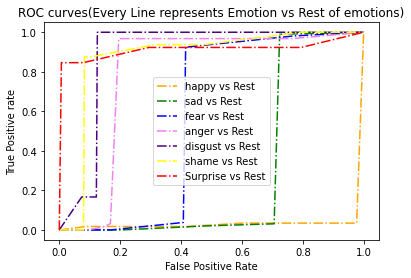

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

false_positive_rate = {}
true_positive_rate = {}
threshold ={}

y_pred = [encoding[x] for x in prediction_y]
y_test_g = [encoding[x] for x in y_test_string_backup]
number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test_g, y_pred, pos_label=i)
       
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='happy vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='sad vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='anger vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='disgust vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='shame vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Surprise vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350); 

**ROC AUC Score**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test_string_backup)

y_test_roc = lb.transform(y_test_string_backup)
y_pred_roc = lb.transform(prediction_y)

In [ ]:
# For Multiclass case
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_roc, y_pred_roc, multi_class='ovo')

0.9436864670936455

**References**:


1.   ktrain official documentation examples: https://nbviewer.jupyter.org/github/amaiya/ktrain/tree/master/examples/
2.   KFold documentation of SKLearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
3. Confusion Matrix method: https://stackoverflow.com/a/59170865

